## Python tutorial for data analysis and visualization in Python
****

### Analyze and visualize year 2018 seismicity distribution in Southern California 

### By Min Chen 
### created on Feb. 11, 2019
### last modified on May 22, 2019 
### chenmi22@msu.edu


## Introduction

Southern Califonia is one of the most earthquake-prone regions in the world. Located on the transform plate boundary between Pacific and North America, the San Andreas Fault hosts a large number of earthquakes every year. In this jupyter notebook, we will use the *.csv data file prepared in a previous notebook for data importing to explore the spatial and temporal variations of the seismicity in Southerm California in year 2018. We will also use this data set to test the Gutenberg-Richter Law, which describes the relationship between the magnitude (M) and the number of earthquakes (N) with magnitude M or larger, a linear relationship between M and log(N) (logarithm to base 10).

Earthquake catalog data credit: [the Southern California Earthquake Data Center.](http://scedc.caltech.edu/research-tools/datasets.html)

### Reference:

1. [Egill Hauksson; Crustal geophysics and seismicity in southern California, Geophysical Journal International, Volume 186, Issue 1, 1 July 2011, Pages 82–98, https://doi.org/10.1111/j.1365-246X.2011.05042.x](https://academic.oup.com/gji/article/186/1/82/701700)
2. [Southern California earthquake catalog](http://service.scedc.caltech.edu/ftp/catalogs/SCEC_DC/)
3. [Hutton et al.,Bulletin of the Seismological Society of America, Vol. 100, No. 2, pp. 423–446, April 2010, doi: 10.1785/0120090130](http://scedc.caltech.edu/about/BSSA_2010_Hutton_SCSN_cat.pdf)


## Goals for this jupyter notebook tutorial

* Learn how to plot geospatial data (e.g., earthquakes and fault lines) on a map
* Learn how to plot the histogram of earthquake data distribution with depth
* Analyze the spatial distribution with respect to the fault zone lines and depth
* Learn how to plot the earthquake occurence rate with time
* Use Southern California seismicity catalog to test the Gutenberg–Richter law

## Section 1: Install GeoPandas package and its dependencides for plotting geospatial data  

GeoPandas is an open source python package for visualizaing geospatial data. You can check the link below for the detailed instructions on how to install GeoPandas on your computer.

[Link to the instructions of installing GeoPandas](http://geopandas.org/install.html)

Open Anaconda-Navigator, then go to "Environments" and search "geopandas" to install, which might take a while, as all the dependencies (such as shapely, fiona, six, and pyproj) need to installed first.

After GeoPandas is installed, please read in the file (2018.catalog.csv) created from the other notebook python_data_importing.ipynb.

In [1]:
# Import all the moddules, packages, and libraries
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# read in the cvs file from the pre-class assignment, which is the 2008 earthquake catalog for Southern California.
eq2018data = pd.read_csv('2018.catalog.csv')
# Deleting multiple columns based on column names in Pandas
eq2018data = eq2018data.drop(['HH:mm:SS.ss','ET', 'GT','M', 'Q', 'EVID', 'NPH', 'NGRM'],axis=1)
# Check the first n=10 rows of the dataframe to make sure the data correctly read
eq2018data.head(n=10)

,YYY/MM/DD,MAG,LAT,LON,DEPTH
0,1/1/18,0.93,34.033,-117.593,2.9
1,1/1/18,0.15,33.649,-116.720,13.5
2,1/1/18,0.57,33.441,-116.438,9.4
3,1/1/18,0.33,33.517,-116.792,4.8
4,1/1/18,0.75,33.440,-116.430,7.6
5,1/1/18,0.47,33.511,-116.793,4.4
6,1/1/18,3.09,34.032,-117.593,4.1
7,1/1/18,1.15,34.035,-117.593,4.3
8,1/1/18,0.57,34.032,-117.593,2.9
9,1/1/18,0.26,33.509,-116.797,5.0


## Section 2: Plot the map with seismicity distribution and fault zone lines  

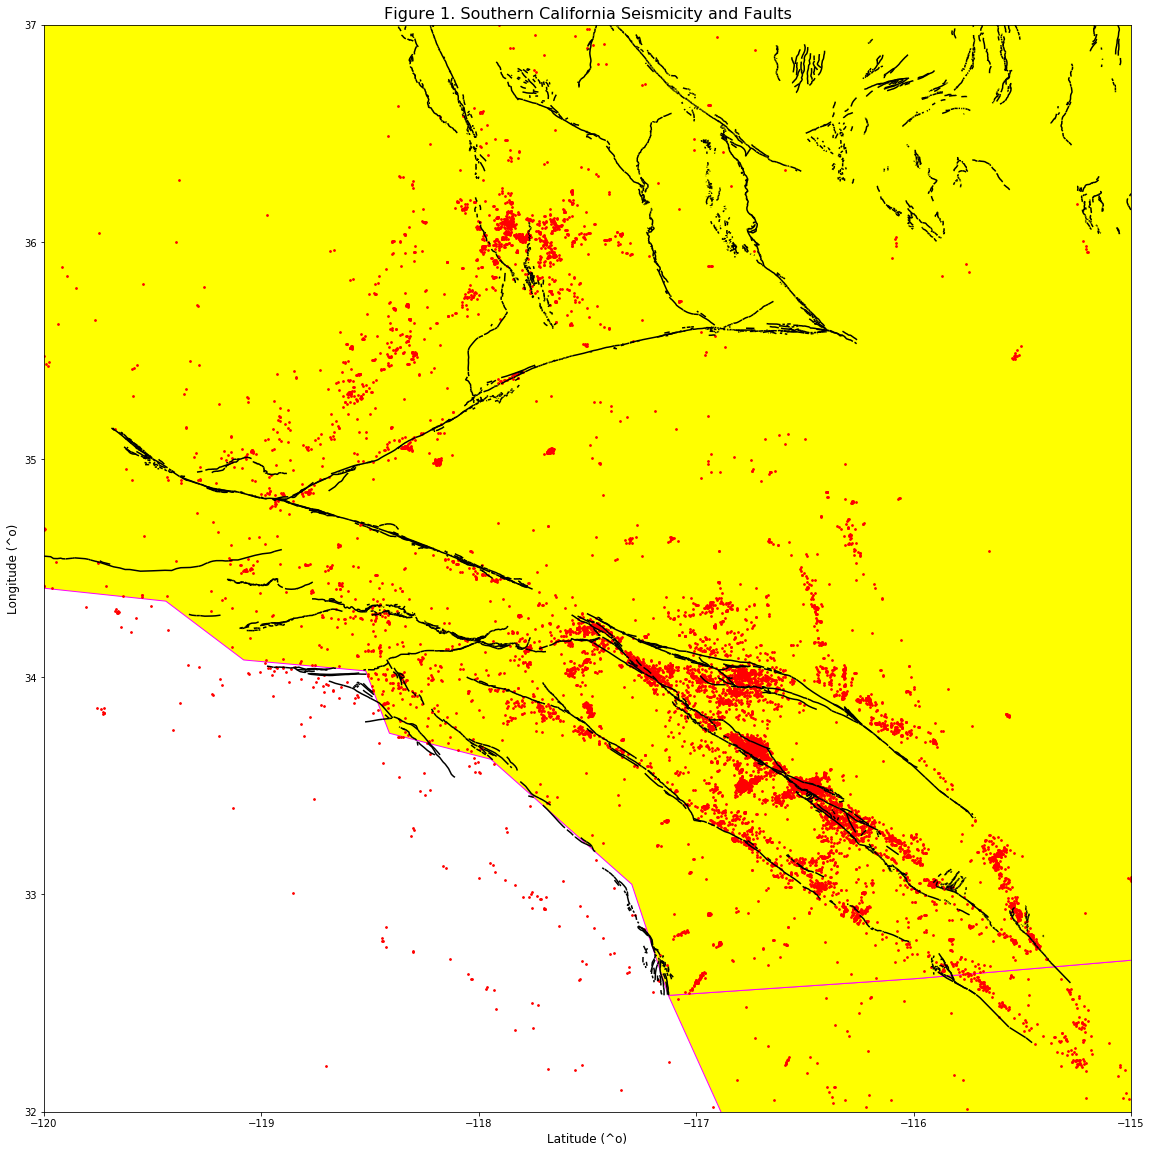

In [9]:
# Locations and information on faults and associated folds in the United States can be
# dowloaded from this web link
# https://www.sciencebase.gov/catalog/item/4f4e4ad5e4b07f02db6838fb

# We need this particular module to plot the earthqaukes as points on the map.
from shapely.geometry import Point

# read in the file containing the faults geometry (or shape) information.
map_df = gpd.read_file("Faults/Faults.shp")

# set the figure size and fault traces color
ax = map_df.plot(color='black',figsize=(20,20))

# turn the earthquake latitue, longitude infomration as a list of point coordinates 
eq2018data['Coordinates'] = list(zip(eq2018data.LON, eq2018data.LAT))
eq2018data['Coordinates'] = eq2018data['Coordinates'].apply(Point)

# read in the Geo data frame the point information.
gdf = gpd.GeoDataFrame(eq2018data, geometry='Coordinates')
gdf.head()

# Read in low-resolution global coast line data set.
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# We restrict to North America.
world[world.continent == 'North America'].plot(ax=ax,
    color=[1,1,0], edgecolor='magenta')

# We can now plot our GeoDataFrame with the earthqukes shown as red dots.
gdf.plot(ax=ax, color='red',markersize=3)

# Specify the map region
plt.xlim([-120, -115])
plt.ylim([32, 37]);

# Add x,y lables and title to the plot.
plt.xlabel("Latitude (^o)",size=12)
plt.ylabel("Longitude (^o)",size=12)
plt.title("Figure 1. Southern California Seismicity and Faults",size=16)
plt.show()


## Section 3: Plot the histogram of the earthquake depths

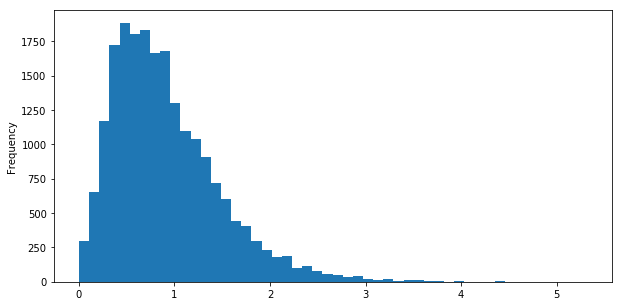

In [12]:
# Set the figure size.
plt.figure(figsize=(10,5))

# plot the histogram of the earthquake depth distribution within 20 bins
eq2018data["MAG"].plot(kind="hist",bins=50)

# Add x,y lables and title to the figure.
#plt.xlabel("Depth (km)",size=12)
#plt.ylabel("Number of Earthquakes",size=12)
#plt.title("Figure 2. Southern California earthquake depth histogram",size=16)

## Section 4: Plot the temporal variations of number of earthquakes monthly

1257
[1257, 1426, 1291, 1482, 1864, 1554, 1637, 2620, 2165, 1791, 1929, 1714]
20730


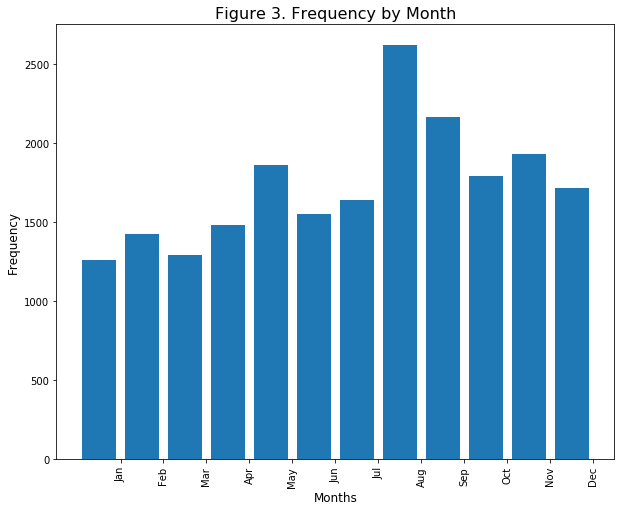

In [13]:
# This package is needed for change the datetime format.
import datetime as dt

# Read in the column of date and convert to datetime format
eq2018data["Date"] = pd.to_datetime(eq2018data["YYY/MM/DD"])

# Extract month information and creeat a new column for it
eq2018data["Month"] = eq2018data["Date"].dt.month

# Group all the earthquakes occuring in the same month together 
month_occurrence = eq2018data.groupby("Month").groups
print(len(month_occurrence[1]))

month = [i for i in range(1,13)]
occurrence = []

# Save the earthquake occurence for each month
for i in range(len(month)):
    val = month_occurrence[month[i]]
    occurrence.append(len(val))

# Check if the numbers are correct 
print(occurrence)
print(sum(occurrence))

# Start a new plot and set the figure size
fig, ax = plt.subplots(figsize = (10,8))
bar_positions = np.arange(12) + 0.5

# Create a list for the x axis annotations of the months
months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
num_cols = months

# Plot the bar chart with earthquake monthly occurrence frequency
bar_heights = occurrence
ax.bar(bar_positions, bar_heights)
tick_positions = np.arange(1,13)
ax.set_xticks(tick_positions)
ax.set_xticklabels(num_cols, rotation = 90)

# Add x,y labels and title.
plt.title("Figure 3. Frequency by Month",size=16)
plt.xlabel("Months",size=12)
plt.ylabel("Frequency",size=12)
plt.show()

## Section 5: Plot the magnitude (M) and the number of earthquakes (N) with magnitude M or larger

[0.         0.27947368 0.55894737 0.83842105 1.11789474 1.39736842
 1.67684211 1.95631579 2.23578947 2.51526316 2.79473684 3.07421053
 3.35368421 3.63315789 3.91263158 4.19210526 4.47157895 4.75105263
 5.03052632 5.31      ]


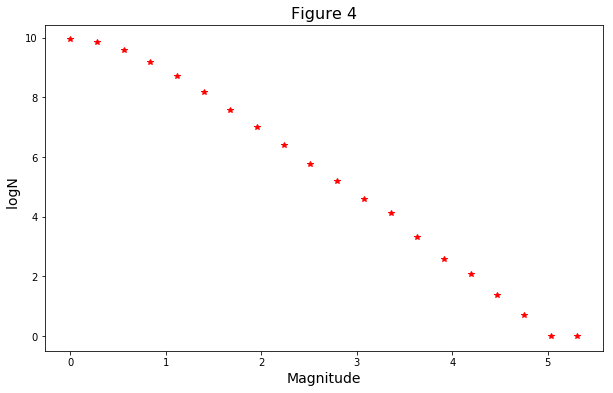

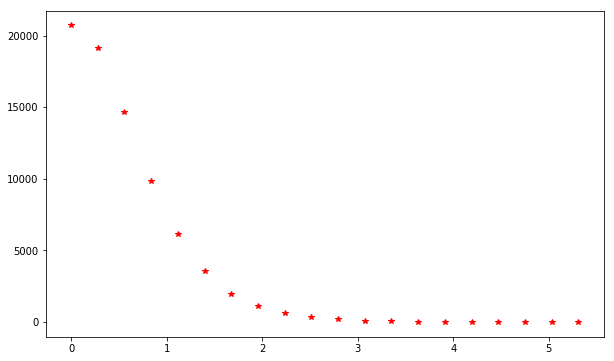

In [15]:
# Create a numpy array (20 points) that spans from the minimum to the maximum magnitude for
# the earthquakes in Southern California.
Magnitude = np.linspace(np.min(eq2018data.MAG),np.max(eq2018data.MAG),20)
print(Magnitude)
# Create an empty list to save the N with magnitude >= M 
N = []
for i in range(len(Magnitude)):
    N_local = eq2018data[eq2018data.MAG>=Magnitude[i]].shape[0]
    N.append(N_local)

# Set up the figure size    
plt.figure(figsize=(10,6))

# Plot base 10 log(N) versus magnitude
plt.plot(Magnitude,np.log(N),'r*')

# Add x,y labels and title.
plt.xlabel("Magnitude",size=14)
plt.ylabel("logN  ",size=14)
plt.title("Figure 4",size=16)

# Set up the figure size    
plt.figure(figsize=(10,6))
plt.plot(Magnitude,N,'r*')



### Questions: How to find the b value?
#### The Gutenberg-Richter's Law is:

$$ \log N = a - b M $$

Use linear regression to find the b value.


In [10]:
# write down your code here and plot
# hint:
import scipy




### Answer the questions on your notebook

### Great job! You're done with your python data analysis and visualization tutorial!